In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/raw/Cleaned_Employee_Data.xlsx')

# Data Overview

In [3]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.shape

(1470, 35)

# Missing Values & Dupes

In [5]:
df_nas = pd.DataFrame(df.isna().sum(), columns=['Number of NAs'])
df_nas['Percentage of NAs'] = round(df_nas['Number of NAs'] / df.shape[0] * 100, 3)
df_nas

,Number of NAs,Percentage of NAs
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [6]:
df.duplicated().sum()

0

# Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df['Attrition'] = df['Attrition'].astype('category')

In [10]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [11]:
df['BusinessTravel'] = df['BusinessTravel'].astype('category')

In [12]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [13]:
df['Department'] = df['Department'].astype('category')

In [14]:
df['Education'].unique()

array([2, 1, 4, 3, 5])

In [15]:
df['Education'] = df['Education'].replace({
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
})

df['Education'] = df['Education'].astype('category')

In [16]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [17]:
df['EducationField'] = df['EducationField'].astype('category')

In [18]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1])

In [19]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
})

df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('category')

In [20]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
df['Gender'] = df['Gender'].astype('category')

In [22]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1])

In [23]:
df['JobInvolvement'] = df['JobInvolvement'].replace({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
})

df['JobInvolvement'] = df['JobInvolvement'].astype('category')

In [24]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5])

In [25]:
df['JobLevel'] = df['JobLevel'].replace({
    1: 'Entry Level',
    2: 'Junior',
    3: 'Mid Level',
    4: 'Senior',
    5: 'Executive'
})

df['JobLevel'] = df['JobLevel'].astype('category')

In [26]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1])

In [27]:
df['JobSatisfaction'] = df['JobSatisfaction'].replace({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
})
df['JobSatisfaction'] = df['JobSatisfaction'].astype('category')

In [28]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [29]:
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [30]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
df['OverTime'] = df['OverTime'].astype('category')

In [32]:
df['PerformanceRating'].unique()

array([3, 4])

In [33]:
df['PerformanceRating'] = df['PerformanceRating'].replace({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Excellent'
})
df['PerformanceRating'] = df['PerformanceRating'].astype('category')

In [34]:
df['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3])

In [35]:
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
})
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype('category')

In [36]:
df['StandardHours'].unique()

array([80])

In [37]:
df.drop(columns='StandardHours', inplace=True)

In [38]:
df.drop(columns='EmployeeCount', inplace=True)

In [39]:
df.drop(columns='Over18', inplace=True)

In [40]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2])

In [41]:
df['StockOptionLevel'] = df['StockOptionLevel'].replace({
    0: 'None',
    1: 'Low',
    2: 'Medium',
    3: 'High'
})

df['StockOptionLevel'] = df['StockOptionLevel'].astype('category')

In [42]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4])

In [43]:
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace({
    1: 'Bad',
    2: 'Fair',
    3: 'Good',
    4: 'Best'
})

df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('category')

In [44]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [45]:
df['JobRole'] = df['JobRole'].astype('category')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   category
 10  Gender                    1470 non-null   category
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   category
 13  JobLevel                  1470 non-null   catego

In [47]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,High,Low,None,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,Excellent,Very High,Low,10,3,Good,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,High,Medium,None,7,3,Good,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,High,High,None,8,3,Good,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,High,Very High,Low,6,3,Good,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,2061,High,...,High,High,Low,17,3,Good,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,2062,Very High,...,High,Low,Low,9,5,Good,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2064,Medium,...,Excellent,Medium,Low,6,0,Good,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,2065,Very High,...,High,Very High,None,17,3,Fair,9,6,0,8


In [48]:
df.describe()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [49]:
df.to_csv('employee_attrition_clean.csv', index=False)

# Correlation with the Attrition variable

In [50]:
raw_data = df.copy()

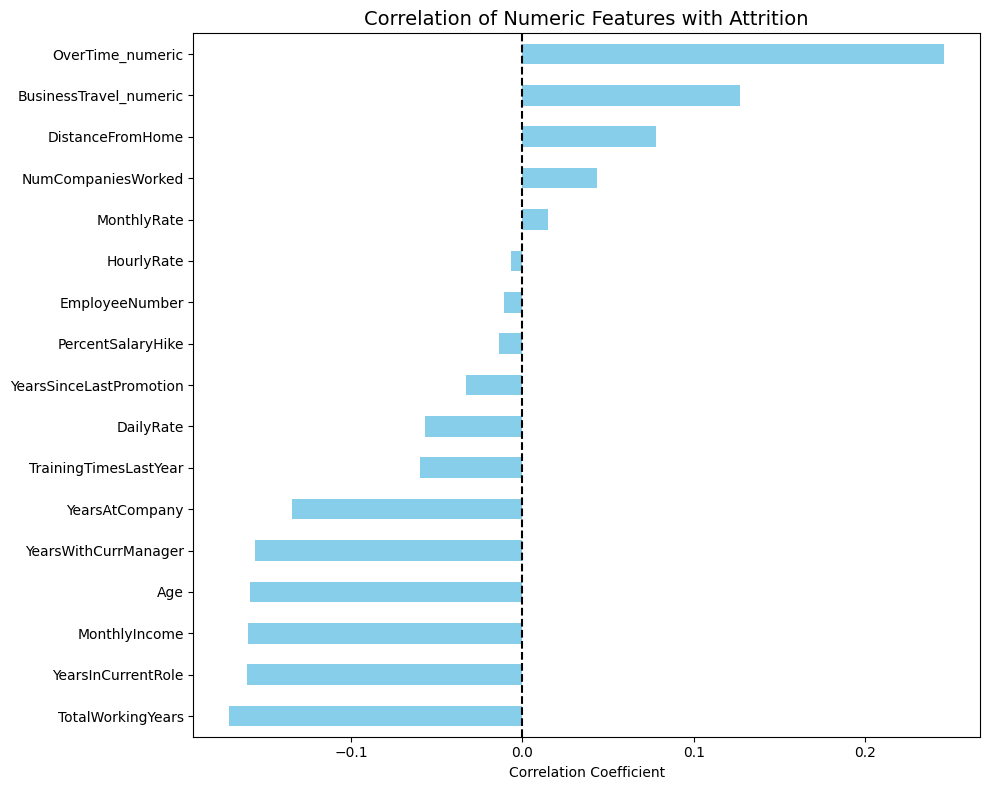

In [51]:
raw_data['Attrition_numeric'] = raw_data['Attrition'].map({'Yes': 1, 'No': 0})
raw_data['BusinessTravel'] = raw_data['BusinessTravel'].str.strip()
raw_data['BusinessTravel_numeric'] = raw_data['BusinessTravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
})
raw_data['OverTime_numeric'] = raw_data['OverTime'].map({'No': 0, 'Yes': 1})

numeric_df = raw_data.select_dtypes(include='number')
numeric_df['Attrition_numeric'] = raw_data['Attrition_numeric']
numeric_df['BusinessTravel_numeric'] = raw_data['BusinessTravel_numeric']
numeric_df['OverTime_numeric'] = raw_data['OverTime_numeric']

correlation = numeric_df.corr()['Attrition_numeric'].drop('Attrition_numeric').sort_values()

plt.figure(figsize=(10, 8))
correlation.plot(kind='barh', color='skyblue')
plt.title('Correlation of Numeric Features with Attrition', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()